# AWS SaaS Sales Data Analysis - Capstone Project Module 2
- By JCDSOL-012B Fariz Aulia Nugraha 

---

## Background
In the competitive field of SaaS (Software as a Service), our company specializes in providing sales and marketing software solutions to other businesses. To optimize our sales strategies and understand our market position better, we are delving into the transactional data collected from our operations. Our goal is to identify patterns, customer behaviors, and product performance, all of which are critical for our growth and customer satisfaction.

## Problem Statement
The company seeks to understand the dynamics of sales transactions and customer engagement. **Which products are driving sales, and what characterizes the transactions that lead to higher profitability?** By analyzing transactional data, we aim to enhance the efficiency of our sales process, tailor our marketing strategies to customer needs, and streamline our product offerings.

As a *Data Analyst*, we aim to address the following question:

**What are the characteristics of transactions that lead to higher sales and profitability, especially compared to those that do not perform as well?**

## General Objectives
- To analyze the sales trends and understand the impact of various factors like discounts, customer segments, and regions on sales.
- To segment the customer base and evaluate the purchasing patterns across different segments and products.
- To develop insights that can inform strategic decisions in product development, marketing, and sales optimization.

## Reference

- Dataset source: https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales

---

# Project Planning and Setup
Define the objectives and key questions of the data analysis.

## Detailed Objectives
1. Understand Sales Dynamics: Analyze overall sales performance, identifying trends, peaks, and troughs over time.
2. Customer Insight: Gain insights into customer behavior, preferences, and segmentation.
3. Product Performance Evaluation: Assess which products are most popular and profitable.
4. Geographical Market Analysis: Understand the geographical distribution of sales and identify key markets.
5. Strategic Recommendations: Provide actionable recommendations for sales strategy, marketing focus, or product development.

## Key Questions

1. Sales Trends:
    1. What are the overall sales trends over time?
    2. Are there any seasonal patterns in sales?
2. Customer Analysis:
    1. Which industries contribute most to the sales?
    2. What are the characteristics of the top-performing customer segments?
3. Product Analysis:
    1. Which products are the top sellers and which are the most profitable?
    2. How does product demand vary by customer segment or region?
4. Geographic Insights:
    1. Which countries or regions are the most lucrative markets?
    2. Is there a relationship between the city development index and sales performance?
5. Sales and Profitability:
    1. How do discounts impact sales and profitability?
    2. Is there a significant difference in the profitability of different customer segments or regions?

---

# Data Exploration
- Load the dataset and familiarize yourself with its structure and content.
- Perform initial exploratory data analysis (EDA) to understand the basic characteristics of the data.

In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Python Libraries

In [2]:
# Importing necessary libraries for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Dataset
Use pandas to load the dataset from the CSV file into a DataFrame. This will allow to manipulate and explore the data.

In [3]:
# Load the dataset
df=pd.read_csv('SaaS-Sales.csv')

## AWS SaaS Sales
This dataset contains transaction data from a fictitious SaaS company selling sales and marketing software to other companies (B2B). In the dataset, ach row represents a product in a transaction, and the columns include:
1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

## Data Understanding
Observe and familiarize with the data structure

In [4]:
# Examine the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [5]:
# Dataset Dimensions
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 9994 rows and 19 columns.


In [6]:
# Preview the first and last few rows of the DataFrame
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


In [7]:
# View summary statistics for numerical and categorical columns
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [8]:
# Check for missing values
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# Identify the number of unique values in each column
df.nunique()

Row ID          9994
Order ID        5009
Order Date      1237
Date Key        1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Customer ID       99
Industry          10
Segment            3
Product           14
License         9994
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
# Sales Data: Summary statistics for the 'Sales' and 'Quantity' columns
print(df[['Sales', 'Quantity']].describe())

              Sales     Quantity
count   9994.000000  9994.000000
mean     229.858001     3.789574
std      623.245101     2.225110
min        0.444000     1.000000
25%       17.280000     2.000000
50%       54.490000     3.000000
75%      209.940000     5.000000
max    22638.480000    14.000000


In [11]:
# Profitability: Summary statistics for the 'Profit' column
print(df['Profit'].describe())

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64


In [12]:
# Discounts: Summary statistics for the 'Discount' column
print(df['Discount'].describe())

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64


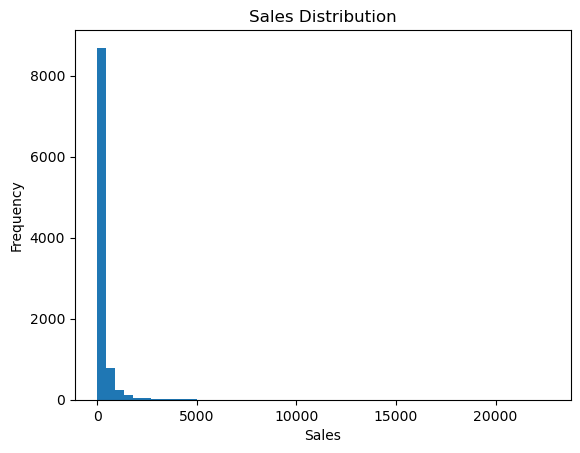

In [13]:
# Sales Distribution: Histogram of 'Sales'
df['Sales'].plot(kind='hist', bins=50, title='Sales Distribution')
plt.xlabel('Sales')
plt.show()


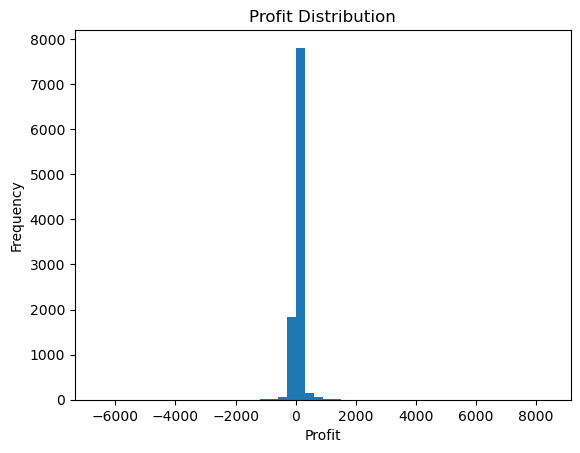

In [14]:
# Profit Distribution: Histogram of 'Profit'
df['Profit'].plot(kind='hist', bins=50, title='Profit Distribution')
plt.xlabel('Profit')
plt.show()

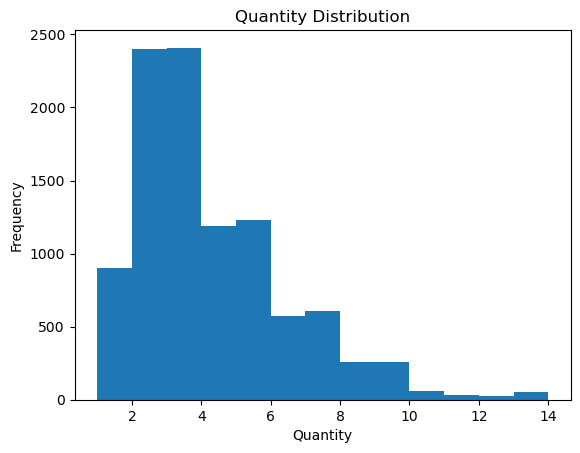

In [15]:
# Quantity Distribution:Histogram of 'Quantity'
df['Quantity'].plot(kind='hist', bins=range(1, df['Quantity'].max()+1), title='Quantity Distribution')
plt.xlabel('Quantity')
plt.show()

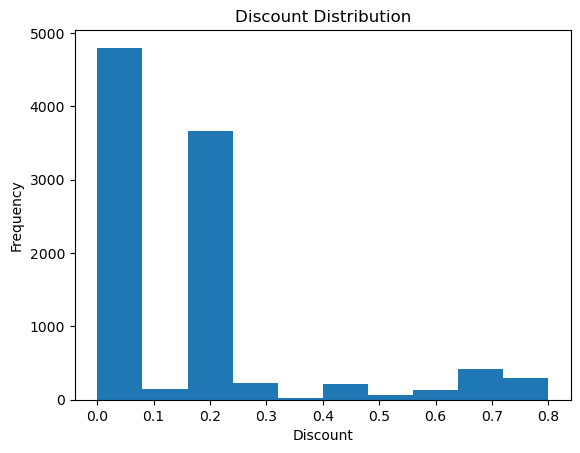

In [16]:
# Discount Distribution: Histogram of 'Discount'
df['Discount'].plot(kind='hist', bins=10, title='Discount Distribution')
plt.xlabel('Discount')
plt.show()


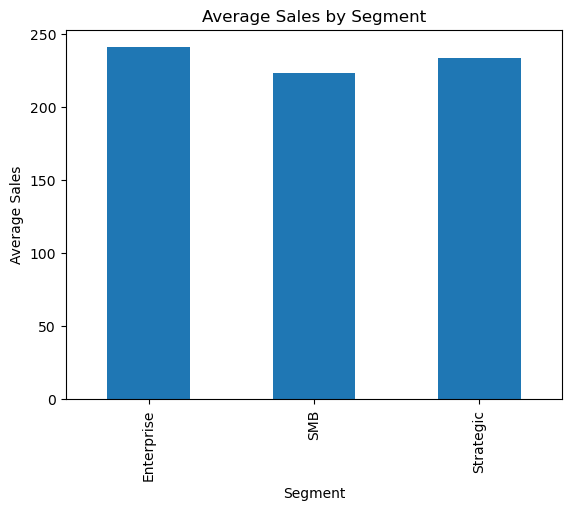

In [17]:
# Sales by Segment: Bar chart of average sales by 'Segment'
df.groupby('Segment')['Sales'].mean().plot(kind='bar', title='Average Sales by Segment')
plt.ylabel('Average Sales')
plt.show()

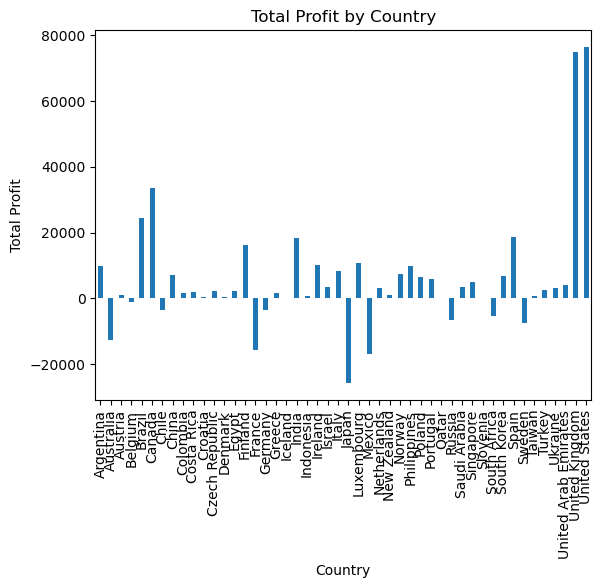

In [18]:
# Profit by Country: Bar chart of total profit by 'Country'
df.groupby('Country')['Profit'].sum().plot(kind='bar', title='Total Profit by Country')
plt.ylabel('Total Profit')
plt.show()

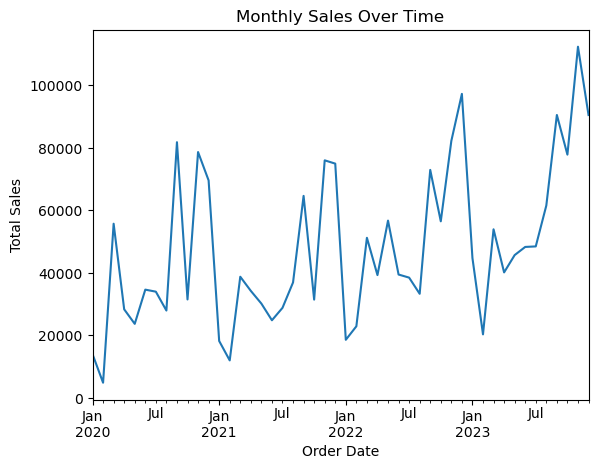

In [19]:
# Sales Over Time: Line plot of sales over time (convert 'Order Date' into datetime format)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date')['Sales'].resample('M').sum().plot(title='Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.show()

## Initial Observations
Based on the initial analysis of the dataset, here are the observations:

1. Dataset Dimensions: The dataset contains 9,994 rows and 19 columns.
2. Columns and Data Types:
    - The dataset consists of a mix of numerical and categorical data types.
    - Numerical columns include 'Row ID', 'Date Key', 'Customer ID', 'Sales', 'Quantity', 'Discount', and 'Profit'.
    - Categorical columns include 'Order ID', 'Order Date', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Industry', 'Segment', 'Product', and 'License'.
3. Missing Values: There are no missing values in the dataset as each column has 9,994 non-null entries.
4. Categorical Data:
    - The 'Order ID' column has 5,009 unique values, suggesting multiple rows may be part of the same order.
    - There are 1,237 unique 'Order Date' entries, indicating the dataset spans several dates.
'Contact Name' has 793 unique values, 'Country' has fewer unique values, and 'City' and 'Industry' categories are also diverse.
    - The 'Segment' column has 3 unique values, and 'Product' has 14 unique values.
5. Sales Data:
    - The 'Sales' column ranges from a minimum of $0.444 to a maximum of $22,638.48.
    - The average (mean) sales amount is approximately $229.86.
    - The 'Quantity' column shows a range from 1 to 14 units per transaction.
6. Profitability:
    - The 'Profit' column varies significantly, ranging from -$6,599.98 to $8,399.98.
    - The average profit is around $28.66 per transaction.
7. Discounts:
    - The 'Discount' column ranges from 0 to 0.8, with an average discount of approximately 15.6%.

---

# Data Cleaning and Preprocessing

## Checking for Missing Values
*There are no missing values in the dataset as mentioned above.*

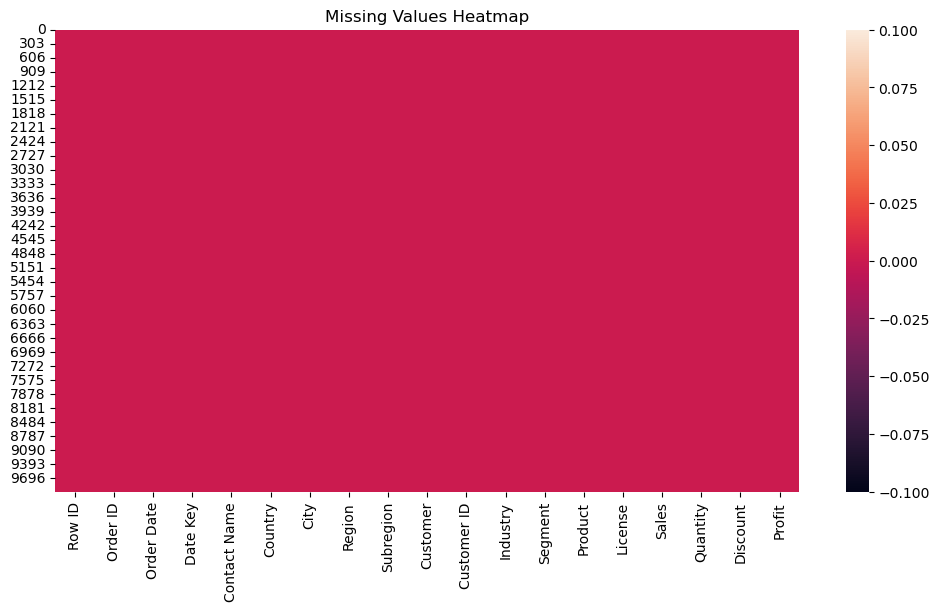

In [20]:
# Plotting missing values heatmap for verification
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna())
plt.title('Missing Values Heatmap')
plt.show()

## Checking for Format Anomalies

In [21]:
# Converting 'Order Date' to Datetime Format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [22]:
# Creating New Variables: Extracting 'Year' and 'Month' from 'Order Date'.
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

## Checking for Outliers

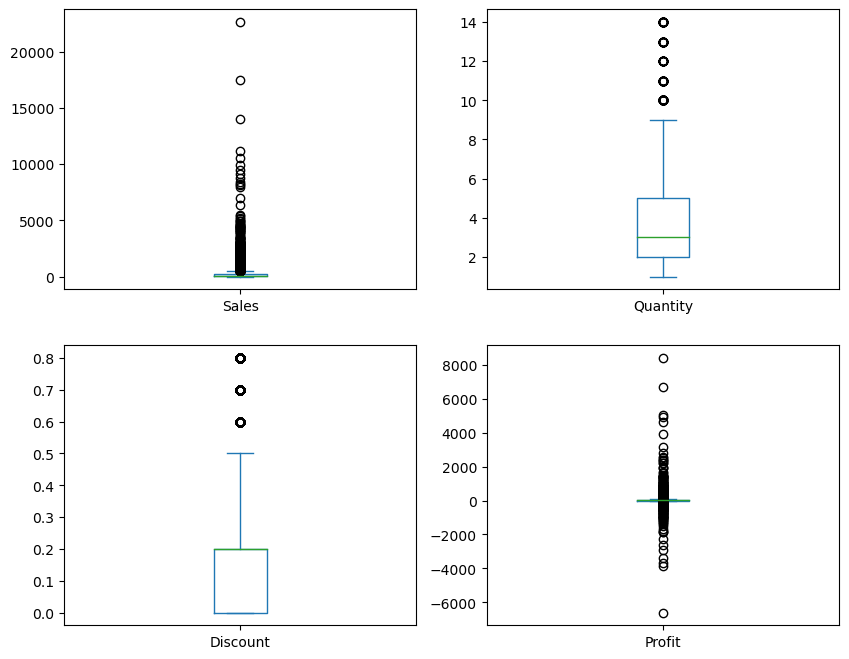

In [23]:
# Checking for outliers using boxplots
df[['Sales', 'Quantity', 'Discount', 'Profit']].plot(kind='box', subplots=True, layout=(2,2), figsize=(10, 8))
plt.show()

## Removing Outliers
Remove outliers using Interquartile Range (IQR) method.
- Determine Outlier Thresholds: Outliers are typically defined as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
- Filter Outliers: Remove data points that fall outside of these thresholds.

In [24]:
# Choose columns to check for outliers
columns_to_check = ['Sales', 'Quantity', 'Discount', 'Profit']

# Calculate Q1, Q3, and IQR for each column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier condition for each column
outlier_condition = ((df[columns_to_check] < (Q1 - 1.5 * IQR)) | (df[columns_to_check] > (Q3 + 1.5 * IQR)))

# Remove outliers (create new DataFrame)
df_new = df[~(outlier_condition).any(axis=1)]

## Review of the Cleaned and Processed DataFrame (df_new)

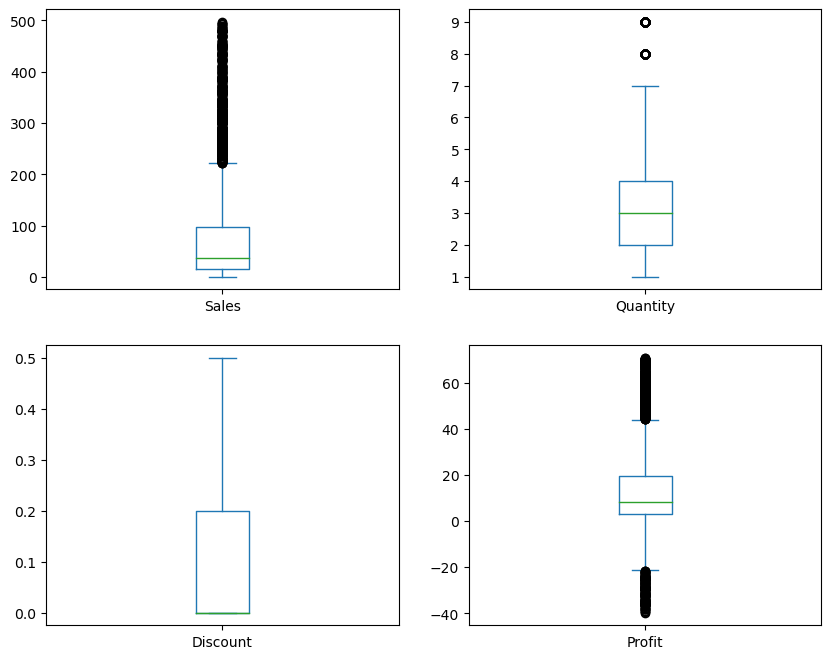

In [25]:
# Verifying the outliers removal using boxplots
df_new[['Sales', 'Quantity', 'Discount', 'Profit']].plot(kind='box', subplots=True, layout=(2,2), figsize=(10, 8))
plt.show()

In [26]:
# Review the structure of the new dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7143 entries, 0 to 9992
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        7143 non-null   int64         
 1   Order ID      7143 non-null   object        
 2   Order Date    7143 non-null   datetime64[ns]
 3   Date Key      7143 non-null   int64         
 4   Contact Name  7143 non-null   object        
 5   Country       7143 non-null   object        
 6   City          7143 non-null   object        
 7   Region        7143 non-null   object        
 8   Subregion     7143 non-null   object        
 9   Customer      7143 non-null   object        
 10  Customer ID   7143 non-null   int64         
 11  Industry      7143 non-null   object        
 12  Segment       7143 non-null   object        
 13  Product       7143 non-null   object        
 14  License       7143 non-null   object        
 15  Sales         7143 non-null   float64      

In [27]:
# Review the first and last few rows of the new DataFrame
display(df_new.head(),df_new.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year,Month
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,Marketing Suite,16GRM07R1K,261.960,2,0.0,41.9136,2022,11
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.620,2,0.0,6.8714,2022,6
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.368,2,0.2,2.5164,2021,10
5,6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,...,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.860,7,0.0,14.1694,2020,6
6,7,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,...,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.280,4,0.0,1.9656,2020,6


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year,Month
9988,9989,EMEA-2023-163629,2023-11-18,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,...,Manufacturing,Strategic,Site Analytics,TFALA50KPS,206.100,5,0.0,55.6470,2023,11
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028,2020,1
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332,2023,2
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932,2023,2
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200,2023,2


## Data Cleaning and Preprocessing Summary:
1. Initial Assessment:
    - Checked for missing values and found none in the dataset.
    - Identified the data types of each column and confirmed they were appropriate for the analysis.
2. Data Type Conversion:
    - Converted the 'Order Date' column from a string format to a datetime format. This step is essential for any time series analysis and makes it easier to handle date-related operations.
3. Feature Engineering:
    - Created new columns 'Year' and 'Month' extracted from the 'Order Date'. These new features are beneficial for analyzing trends over time and conducting seasonal analysis.
4. Prepared Dataset for Analysis:
    - The final dataset, now cleaned and enhanced with additional features, is ready for in-depth analysis. It's better suited for exploring sales trends, customer behavior, and product performance.
5. Outlier Detection and Removal:
    - Focused on the columns 'Sales', 'Quantity', 'Discount', and 'Profit' for outlier analysis.
    - Used the Interquartile Range (IQR) method to detect outliers.
    - Defined outliers as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR for each of these columns.
    - Removed rows containing any outliers in these columns, resulting in a dataset with a more normalized distribution for these key variables.

In [28]:
# # Export the Cleaned and Processed DataFrame (df_new) to a new CSV file for further analysis (e.g. Tableau, etc.)
# df_new.to_csv('SaaS-Sales_Processed.csv', index=False)

---

# Data Analysis
- Descriptive Analysis: Calculate basic statistics to understand the distribution of key variables like Sales, Profit, etc.
- Trend Analysis: Analyze sales and profit trends over time.
- Customer Segmentation: Group customers based on certain criteria (e.g., industry, region, buying behavior).
- Product Performance Analysis: Assess which products are bestsellers and which are the most profitable.
- Geographical Analysis: Analyze sales distribution across different regions or countries.

In [29]:
# Descriptive Analysis
df_new[['Sales', 'Profit', 'Quantity', 'Discount']].describe()

,Sales,Profit,Quantity,Discount
count,7143.000000,7143.000000,7143.000000,7143.000000
mean,75.707309,13.001752,3.407112,0.096742
std,92.209665,17.187931,1.879085,0.106372
min,0.990000,-39.637000,1.000000,0.000000
25%,15.552000,3.240300,2.000000,0.000000
50%,37.752000,8.299200,3.000000,0.000000
75%,98.376000,19.623600,4.000000,0.200000
max,496.860000,70.722000,9.000000,0.500000


## 1. Sales and Profit Trends Analysis

### 1-1. Overall Sales and Profit Trends Over Time
- This line graph illustrates the total sales and profit for each month across different years. It highlights how sales and profit figures have evolved, helping to identify any long-term trends or significant changes in sales and profit performance over time.

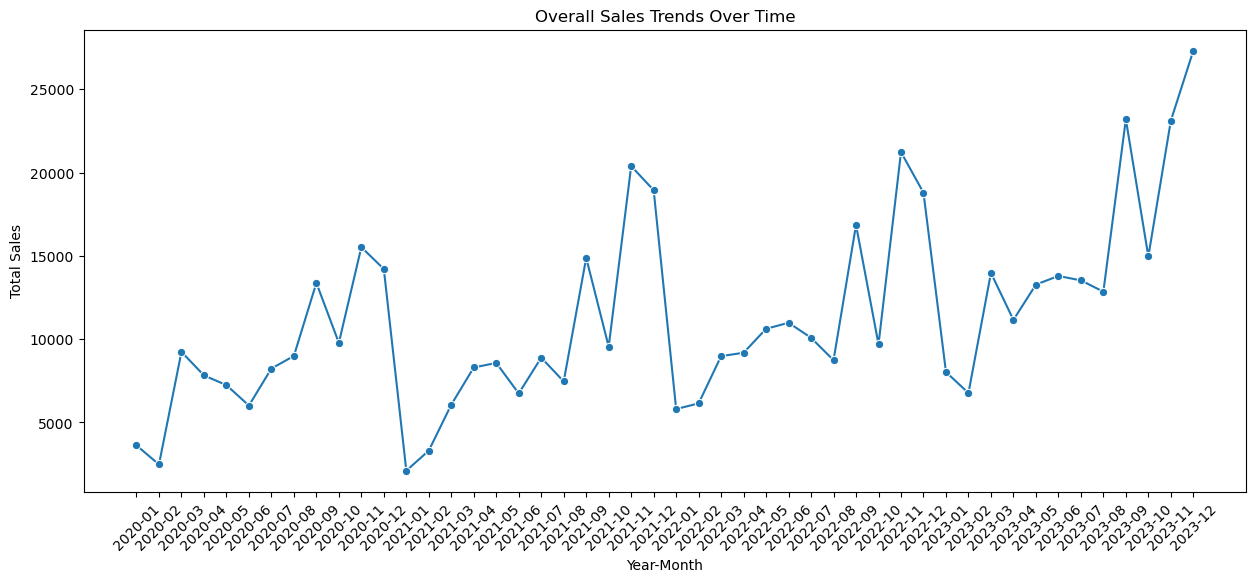

In [30]:
# Group by Year and Month and sum the sales
monthly_sales = df_new.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Creating a combined year-month column for plotting
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

# Plotting the Sales Trends
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title('Overall Sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()


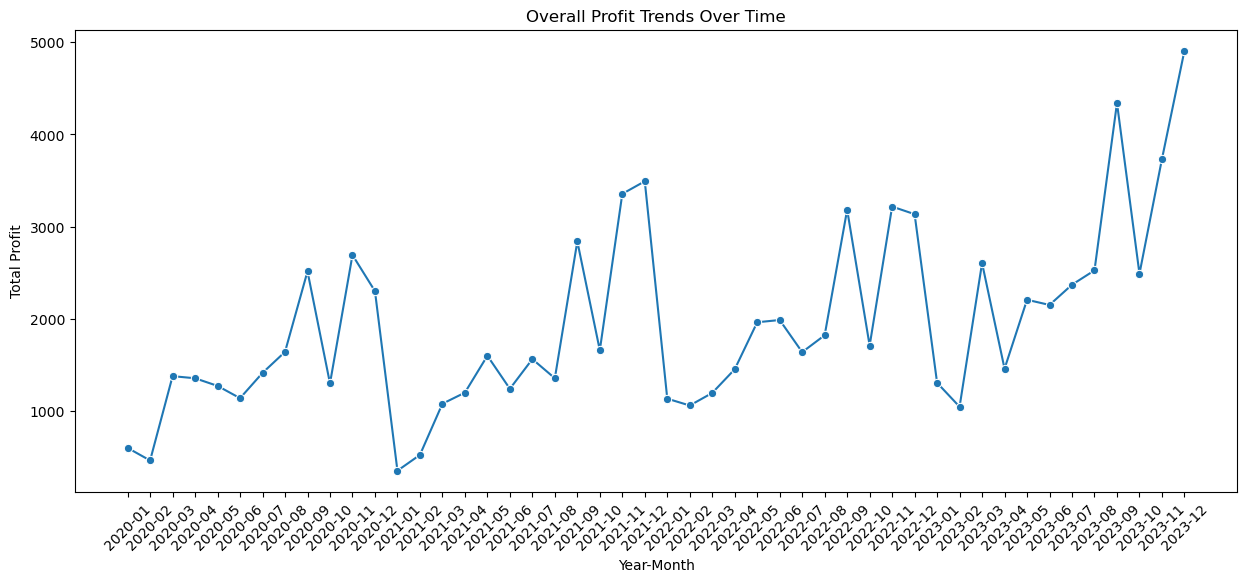

In [31]:
# Group by Year and Month and sum the profit
monthly_profit = df_new.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

# Creating a combined year-month column for plotting
monthly_profit['Year-Month'] = monthly_profit['Year'].astype(str) + '-' + monthly_profit['Month'].astype(str).str.zfill(2)

# Plotting the Profit Trends
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_profit, x='Year-Month', y='Profit', marker='o')
plt.xticks(rotation=45)
plt.title('Overall Profit Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.show()

Overall Sales Trends Over Time:
- The sales trend shows fluctuation from month to month, with some peaks suggesting periods of high sales.
- There is a visible upward trend towards the end of the graph, which could indicate growth over time or seasonality affecting sales.
- There are noticeable peaks, which may correspond to seasonal events or successful marketing campaigns that require further investigation to understand their cause.
- The trend does not show a smooth progression but rather sharp increases and decreases, suggesting variability in sales performance that could be due to various factors like new product releases, market changes, or seasonal demand.

Overall Profit Trends Over Time:
- The profit trend also fluctuates, but it seems less volatile than the sales trend, indicating that while sales may vary significantly, the profit margins might be more stable.
- Similar to sales, there is a noticeable increase in profit towards the latest months in the dataset, possibly indicating effective sales strategies or cost management improvements.
- The peaks in profit do not always align with the peaks in sales, which suggests that the highest sales periods do not necessarily translate to the highest profit periods. This could be due to varying profit margins on products sold in different periods or additional costs incurred during higher sales periods.

### 1-2. Seasonal Patterns in Sales and Profit
- The heatmap provides a month-by-month breakdown of sales and profit across different years. This visualization is particularly useful for identifying seasonal patterns, such as specific months with consistently high or low sales and profit, indicating seasonality in the sales and profit data.

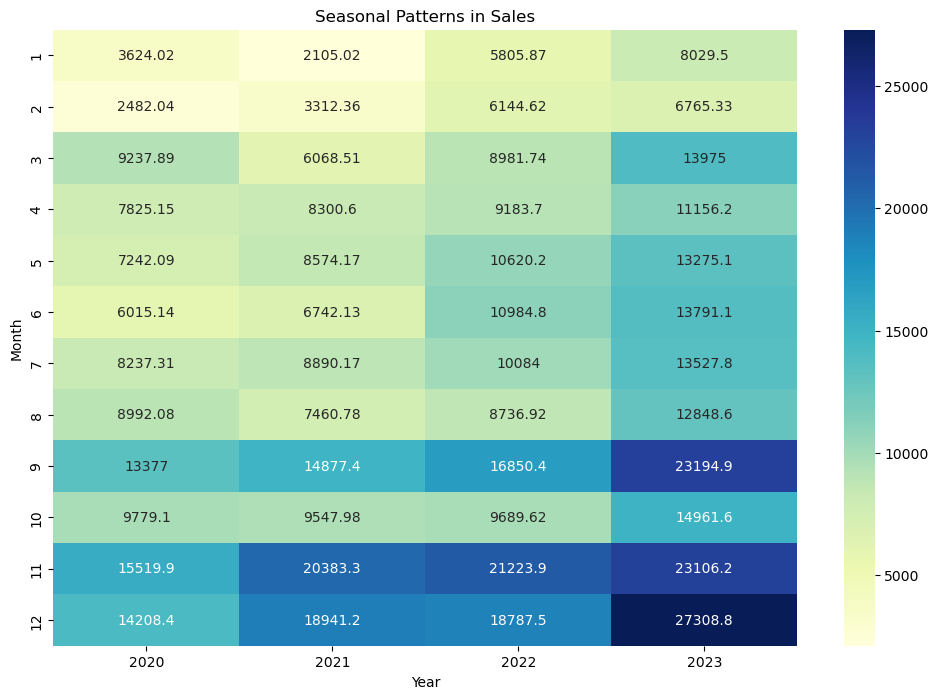

In [32]:
# Creating a pivot table for sales based on Month and Year
seasonal_sales_pivot = df_new.pivot_table(index='Month', columns='Year', values='Sales', aggfunc='sum')

# Plotting a heatmap for Seasonal Sales Patterns
plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_sales_pivot, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Seasonal Patterns in Sales')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


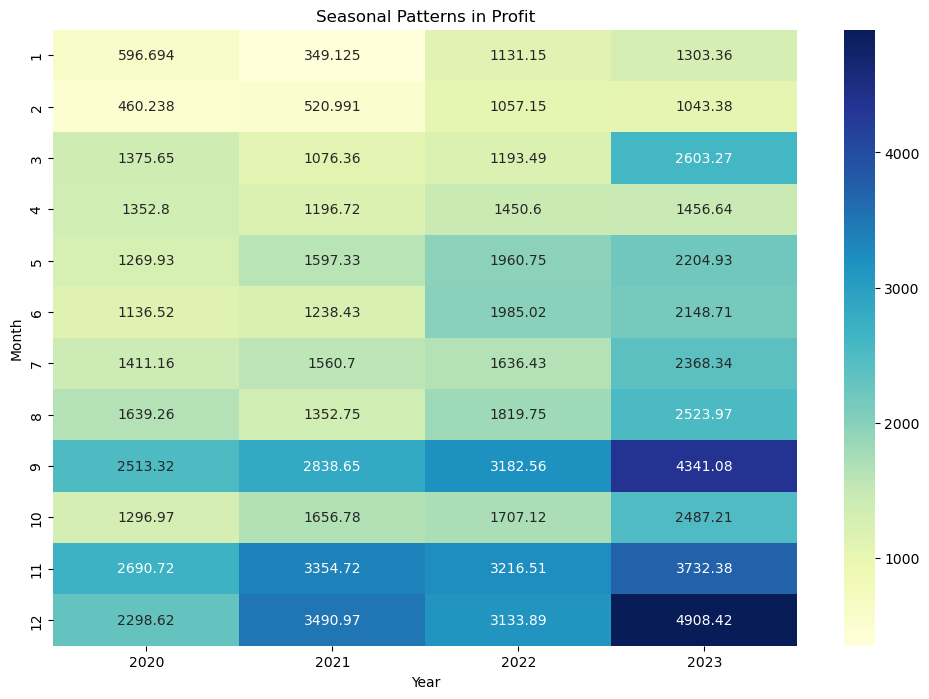

In [33]:
# Creating a pivot table for profit based on Month and Year
seasonal_profit_pivot = df_new.pivot_table(index='Month', columns='Year', values='Profit', aggfunc='sum')

# Plotting a heatmap for Seasonal Profit Patterns
plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_profit_pivot, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Seasonal Patterns in Profit')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

Seasonal Patterns in Sales:
- There is a clear pattern where certain months consistently show higher sales across the years. For example, the months towards the end of the year seem to have higher sales, which could be due to seasonal shopping periods like holidays.
- There's an observable trend of increasing sales from the beginning to the end of the year, with a noticeable jump in sales during the last few months. This could be indicative of a strong end-of-year performance, possibly due to holiday sales or end-of-year budget spending in B2B environments.
- The year-over-year growth in sales is also evident, with later years showing higher sales figures in the same months compared to earlier years, suggesting a healthy growth trajectory for the company.

Seasonal Patterns in Profit:
- Similar to sales, profits also show seasonality with higher profits often occurring in the same months as higher sales.
- There are months where profit peaks do not align perfectly with sales peaks, which suggests that during some high sales periods, profit margins might be thinner. This could be due to various factors such as increased discounting during those periods or the mix of products sold having lower margins.
- The end-of-year surge in profitability is consistent with the sales trends, which again might be reflective of seasonal shopping behavior or annual business cycles.
- Profit figures also appear to be growing year over year, though the pattern is not as pronounced as with sales, possibly due to varying cost factors or changes in product/service mix.

In summary, both sales and profit exhibit clear seasonal trends with significant peaks toward the end of the year, which is a common pattern in many businesses due to holiday seasons or fiscal year-end budget utilization. The company could leverage this information to optimize inventory, staffing, and marketing efforts to capitalize on these peak periods. 

## 2. Customer Analysis

### 2-1. Sales Contribution by Industry
- This bar graph shows the total sales contributed by each industry. It highlights which industries are the most significant contributors to the overall sales, providing insights into where the company's main customer base lies.

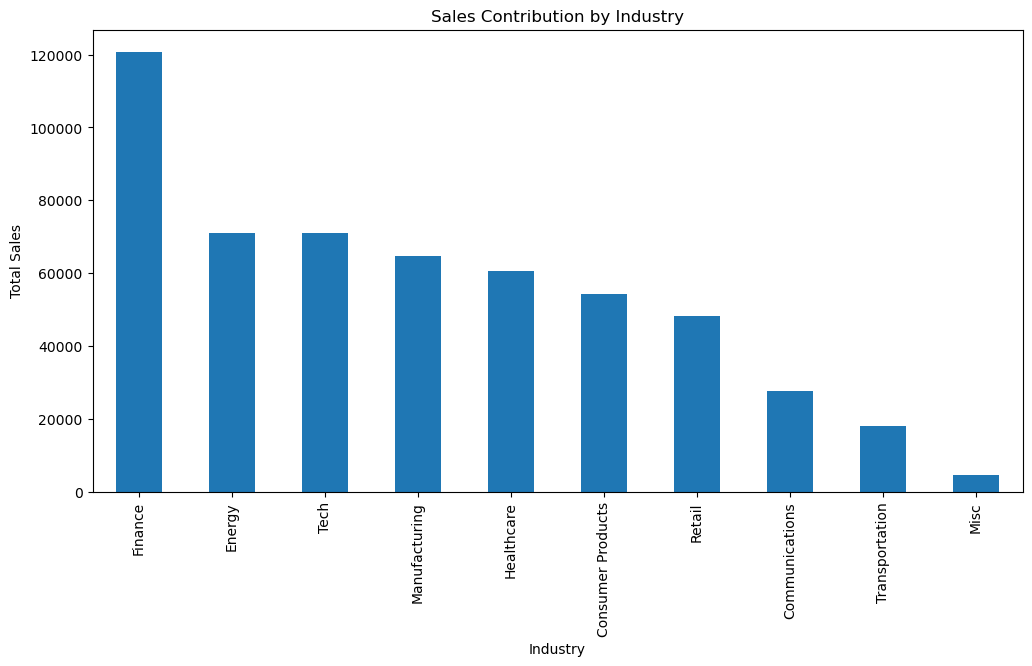

In [34]:
# Grouping by industry and summing up sales
industry_sales = df_new.groupby('Industry')['Sales'].sum().sort_values(ascending=False)

# Plotting Sales Contribution by Industry
plt.figure(figsize=(12, 6))
industry_sales.plot(kind='bar')
plt.title('Sales Contribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Sales')
plt.show()

Sales Contribution by Industry:
- The Finance industry is the largest contributor to sales, followed by Energy, Tech, and Manufacturing. This suggests a strong market presence in these sectors.
- Industries such as Retail and Transportation have much lower sales, which may indicate either a smaller market size, less focus from the company, or stronger competition in these areas.
- The significant lead of the Finance industry could be due to higher-priced products/services, a larger customer base, or a higher transaction volume.

### 2-2. Sales by Customer Segment and Industry
- The heatmap displays the sales distribution across different customer segments and industries. This visualization helps in understanding which combinations of customer segments and industries are the most lucrative, indicating the characteristics of top-performing customer segments.

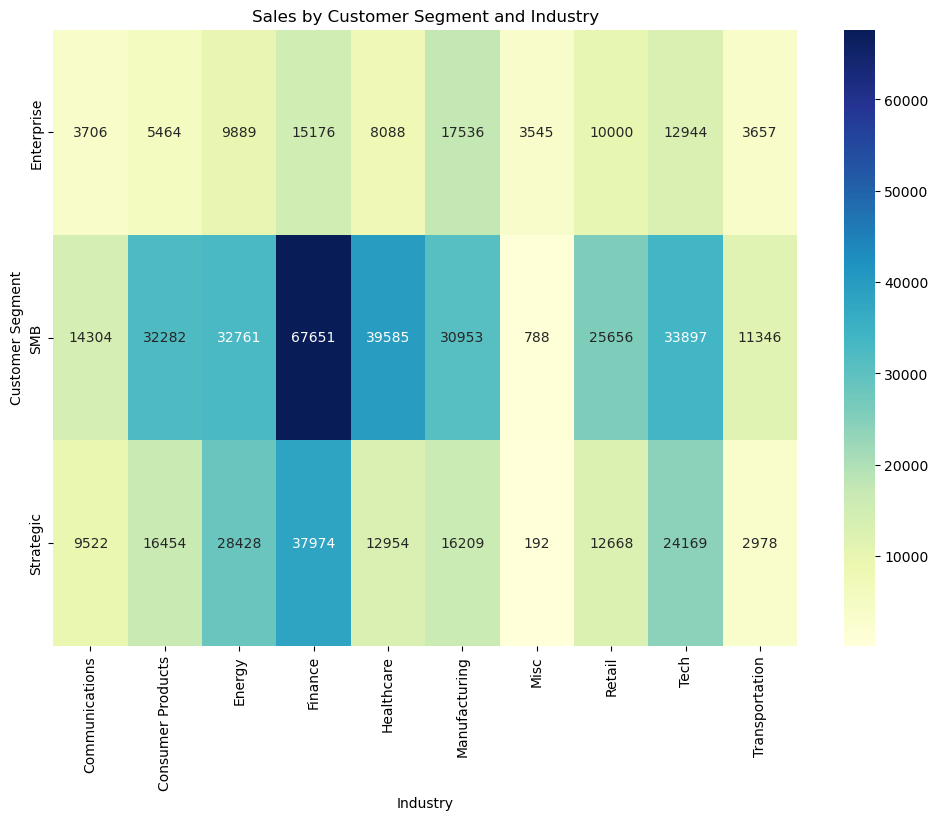

In [35]:
# First, create a pivot table with customer segments as rows, industries as columns, and sales as values
segment_industry_sales = df_new.pivot_table(index='Segment', columns='Industry', values='Sales', aggfunc='sum')

# Now, use seaborn to create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(segment_industry_sales, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Sales by Customer Segment and Industry')
plt.xlabel('Industry')
plt.ylabel('Customer Segment')
plt.show()


Sales by Customer Segment and Industry:
- The heatmap reveals how sales are distributed across different customer segments (e.g., SMB, Enterprise) within each industry.
- The SMB (Small and Medium Business) segment in the Finance industry has the highest sales, indicating strong penetration and possibly a product-market fit for this segment in Finance.
- Other industries like Tech and Healthcare show a more balanced distribution of sales across SMB and Enterprise segments.
- The Strategic segment has comparatively lower sales across most industries, which could suggest that these are either highly specialized offerings with a smaller client base or that there's room for growth in this segment.

## 3. Product Analysis

### 3-1. Top-Selling and Most Profitable Products
- Aggregate the data by 'Product' and calculate the sum of 'Sales' and 'Profit', then sort and plot the top 10 for each.

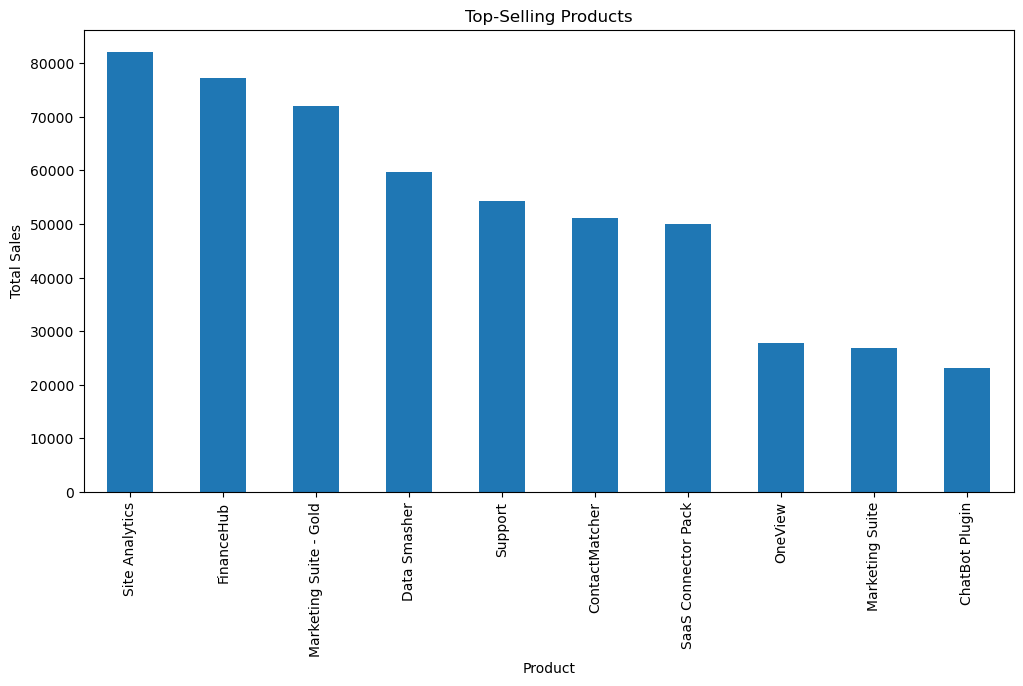

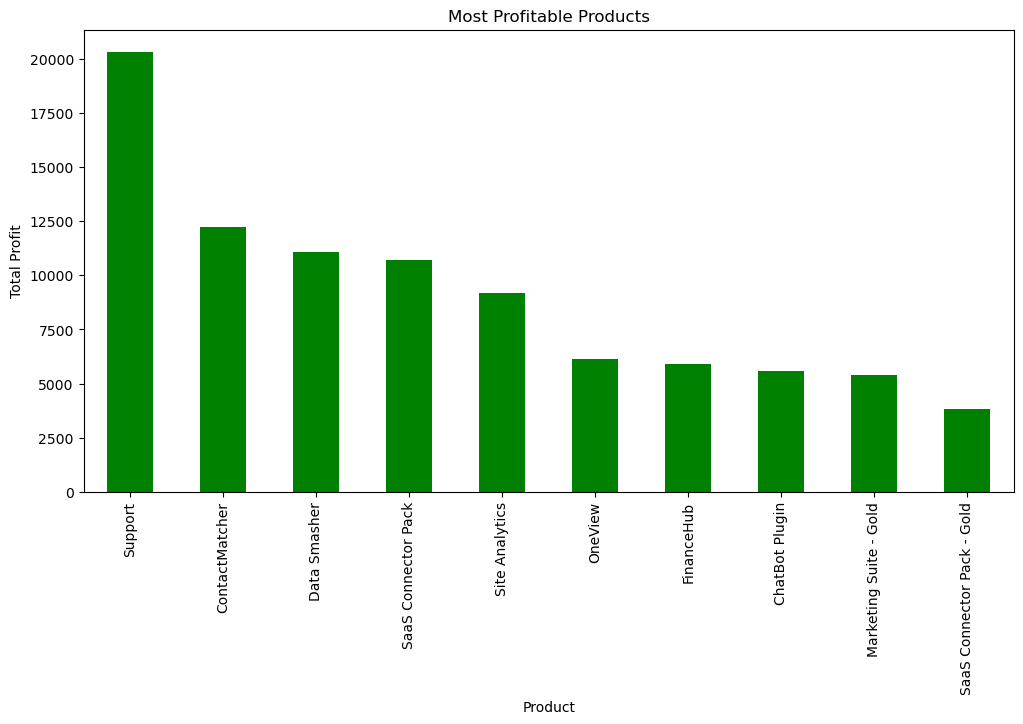

In [36]:
# Calculating total sales and profit for each product
product_performance = df_new.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'})

# Identifying top-selling products
top_selling_products = product_performance.sort_values(by='Sales', ascending=False).head(10)

# Identifying most profitable products
most_profitable_products = product_performance.sort_values(by='Profit', ascending=False).head(10)

# Plotting Top-Selling Products
plt.figure(figsize=(12, 6))
top_selling_products['Sales'].plot(kind='bar')
plt.title('Top-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

# Plotting Most Profitable Products
plt.figure(figsize=(12, 6))
most_profitable_products['Profit'].plot(kind='bar', color='green')
plt.title('Most Profitable Products')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.show()


Top-Selling Products:
- "Site Analytics" and "FinanceHub" are the leading products in terms of sales, indicating a strong market demand for these products.
- The products appear to offer a range of functionalities, from analytics to financial management tools, suggesting that the company's product offerings are diverse and cater to different customer needs.
- The sales are relatively evenly distributed among the top products, which could imply that the company does not rely on a single product for its revenue, thereby reducing risk.

Most Profitable Products:
- "Support" emerges as the most profitable product, despite not being the top seller. This suggests that while it may not have the highest sales volume, it likely has a high-profit margin or lower associated costs.
- There is not a direct correlation between the top-selling and most profitable products. For instance, "Site Analytics" is the top seller but does not appear as the most profitable, which could indicate competitive pricing or higher costs associated with this product.
- Understanding the factors that contribute to the profitability of "Support" and other high-margin products could inform strategies to maximize profitability across the product range.

### 3-2. Product Demand by Customer Segment
- Create pivot tables for both segments and regions to visualize the sales data across these dimensions using heatmaps.

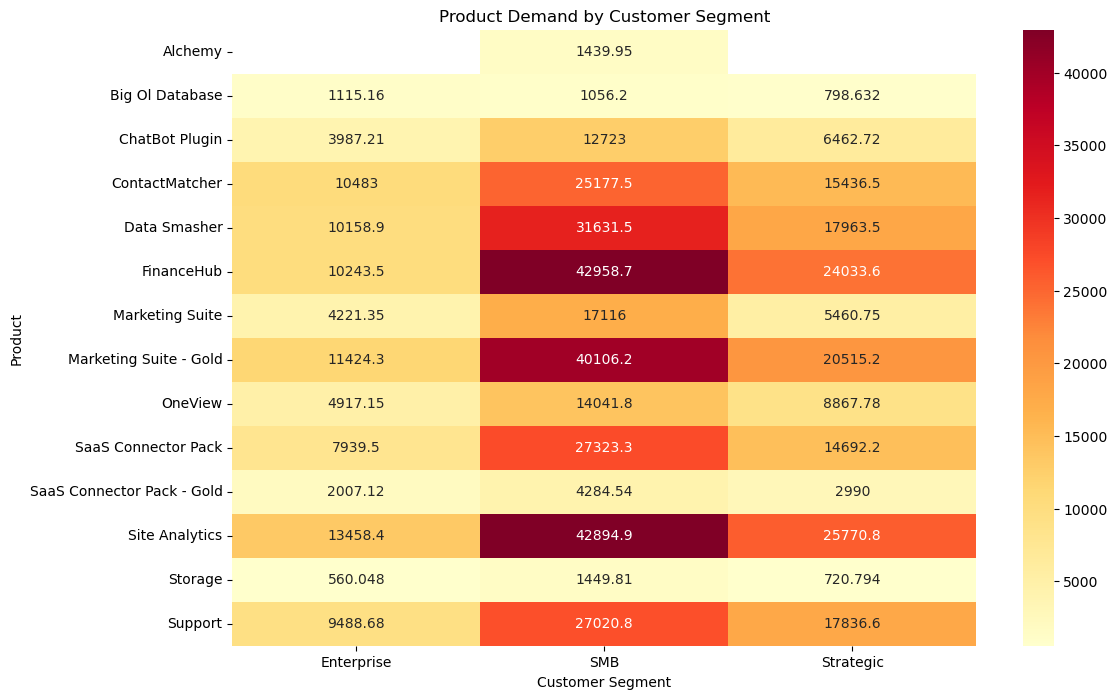

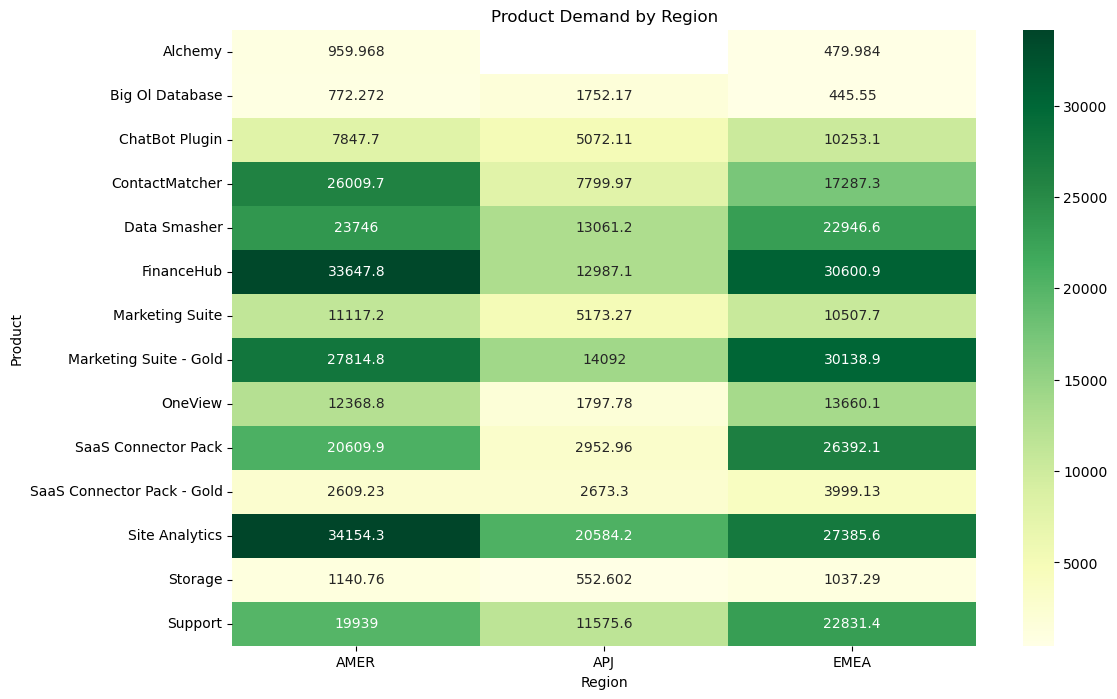

In [37]:
# Analyzing product demand by customer segment
product_demand_segment = df_new.groupby(['Product', 'Segment']).agg({'Sales': 'sum'}).reset_index()

# Corrected Pivot table for heatmap
pivot_segment = product_demand_segment.pivot(index='Product', columns='Segment', values='Sales')

# Heatmap of Product Demand by Customer Segment
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_segment, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Product Demand by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Product')
plt.show()

# Analyzing product demand by region
product_demand_region = df_new.groupby(['Product', 'Region']).agg({'Sales': 'sum'}).reset_index()

# Corrected Pivot table for heatmap
pivot_region = product_demand_region.pivot(index='Product', columns='Region', values='Sales')

# Heatmap of Product Demand by Region
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_region, annot=True, cmap='YlGn', fmt='g')
plt.title('Product Demand by Region')
plt.xlabel('Region')
plt.ylabel('Product')
plt.show()


Product Demand by Customer Segment:
- The heatmap showcases that certain products have a significantly higher demand in specific customer segments. For example, "Marketing Suite - Gold" and "Data Smasher" show particularly high sales in the SMB (Small and Medium Business) segment.
- "Support" is the most demanded product in the Enterprise segment, indicating that larger companies may have a higher need for support services.
- "ContactMatcher" has high demand across both SMB and Enterprise segments, suggesting it's a versatile product with wide appeal.
- The Strategic segment has overall lower figures compared to SMB and Enterprise, which could indicate that the products may not be as well aligned with the strategic needs of the customers or that this segment represents a smaller portion of the overall market.

Product Demand by Region:
- The heatmap illustrates that product demand is not uniform across regions. For instance, "Data Smasher" and "FinanceHub" have higher sales in the AMER (Americas) region compared to APJ (Asia-Pacific Japan) and EMEA (Europe, Middle East, and Africa).
- Products like "ContactMatcher" and "SaaS Connector Pack" have substantial demand in all three regions, indicating their global relevance.
- It's noticeable that the AMER region has the highest demand for most products, which could signify a stronger market presence or a more extensive customer base in that region.

## 4. Geographic Analysis

### 4-1. Highest Sales and Profits by Countries and Regions
- Top 5 Countries by Sales and Profit bar graph compares the top 5 countries in terms of sales and profit. The dual bars for each country show the sales (in sky blue) alongside the profit (in green).
- Sales and Profit by Region graph illustrates the sales and profit distribution across different regions, with sales represented in orange and profit in purple.

In [38]:
# 4-1. Highest Sales and Profits by Countries and Regions
sales_by_country = df_new.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales', ascending=False)
sales_by_region = df_new.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales', ascending=False)
sales_by_country.head(), sales_by_region.head()

(                      Sales      Profit
 Country                                
 United States   130572.2035  23229.9930
 United Kingdom   61725.5150  13652.2782
 Japan            47247.9012   3832.1465
 Canada           33266.2440   6260.9726
 France           25052.7350   1195.3171,
               Sales      Profit
 Region                         
 AMER    222737.4295  38772.2394
 EMEA    217965.5610  39729.4960
 APJ     100074.3202  14369.7793)

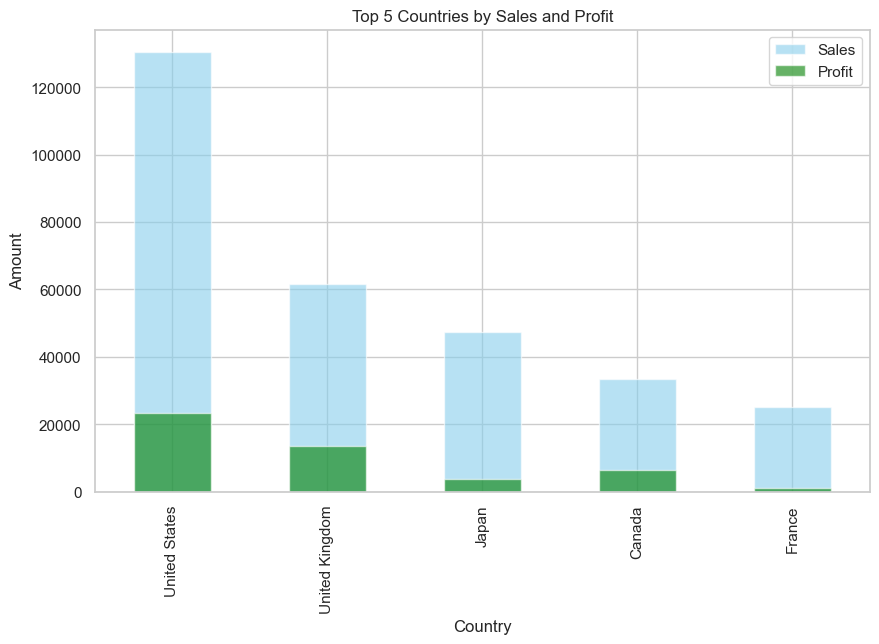

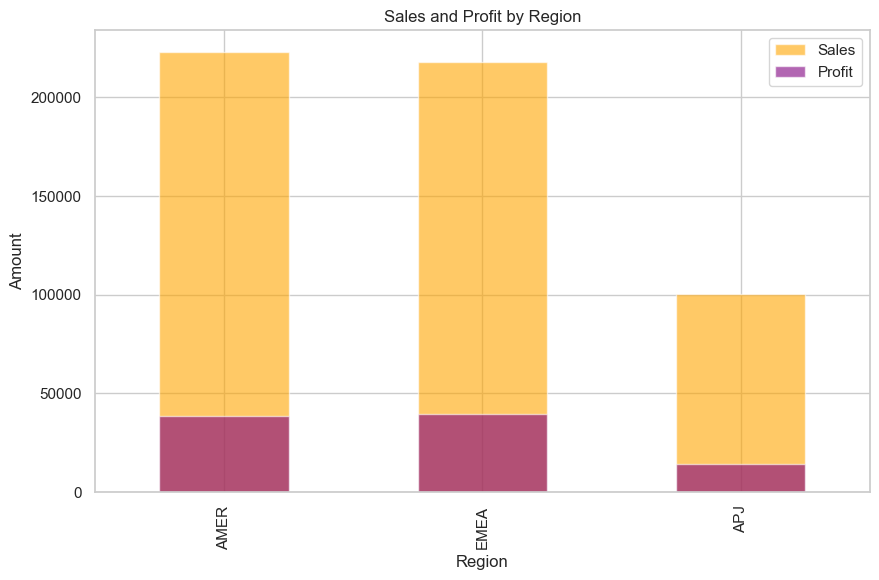

In [39]:
# Setting plot style
sns.set(style="whitegrid")

# Plot for Top Countries by Sales and Profit
plt.figure(figsize=(10, 6))
sales_by_country['Sales'].head(5).plot(kind='bar', color='skyblue', alpha=0.6, label='Sales')
sales_by_country['Profit'].head(5).plot(kind='bar', color='green', alpha=0.6, label='Profit')
plt.title('Top 5 Countries by Sales and Profit')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Plot for Top Regions by Sales and Profit
plt.figure(figsize=(10, 6))
sales_by_region['Sales'].plot(kind='bar', color='orange', alpha=0.6, label='Sales')
sales_by_region['Profit'].plot(kind='bar', color='purple', alpha=0.6, label='Profit')
plt.title('Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend()
plt.show()

Top 5 Countries by Sales and Profit:
- The United States stands out as the top country with a significant lead in both sales and profit, indicating a strong market presence and effective operations in the region.
- The United Kingdom follows as the second-highest, but with a considerable gap compared to the United States. This suggests a solid market position, albeit with room for growth.
- Japan, Canada, and France round out the top five, with Japan and Canada showing a closer parity between sales and profit than France. This could indicate different operational efficiencies, cost structures, or market strategies within these countries.
- The ratio of profit to sales varies by country, which could reflect the impact of local pricing strategies, cost of sales, or the mix of products sold.

Sales and Profit by Region:
- The AMER region dominates in terms of sales and profit, followed by EMEA and then APJ. This implies that the Americas are the strongest market for the company, while the Asia-Pacific region presents the least amount of sales and profit among the three.
- The profit margins (as indicated by the ratio of profit to sales) appear to be consistent across AMER and EMEA, while APJ shows a slightly smaller profit relative to sales, which may suggest different market dynamics or cost implications in that region.

### 4-2. Product Popularity in Different Countries and Regions
- Top Products in Top 5 Countries bar graph shows the top products in the top 5 countries based on sales. Each country's top product is highlighted, providing insight into product popularity in different markets.
- Top Products in Regions visualization compares the top products in each region, showcasing regional preferences or market strengths.

In [40]:
# 4-2. Product Popularity in Different Countries and Regions
# Grouping by Product, Country, and Region and summing sales
product_country_sales = df_new.groupby(['Product', 'Country']).agg({'Sales': 'sum'}).reset_index()
product_region_sales = df_new.groupby(['Product', 'Region']).agg({'Sales': 'sum'}).reset_index()

# Finding top products for each country and region (based on sales)
top_product_country = product_country_sales.sort_values(['Sales', 'Country'], ascending=[False, True]).groupby('Country').head(1)
top_product_region = product_region_sales.sort_values(['Sales', 'Region', ], ascending=[False, True]).groupby('Region').head(1)

top_product_country.head(), top_product_region.head()

(                    Product         Country      Sales
 393          Site Analytics   United States  21884.008
 372          Site Analytics           Japan  11556.632
 179              FinanceHub  United Kingdom  10710.591
 209  Marketing Suite - Gold          Canada   6021.740
 151              FinanceHub          France   5166.427,
            Product Region      Sales
 32  Site Analytics   AMER  34154.282
 16      FinanceHub   EMEA  30600.882
 33  Site Analytics    APJ  20584.222)

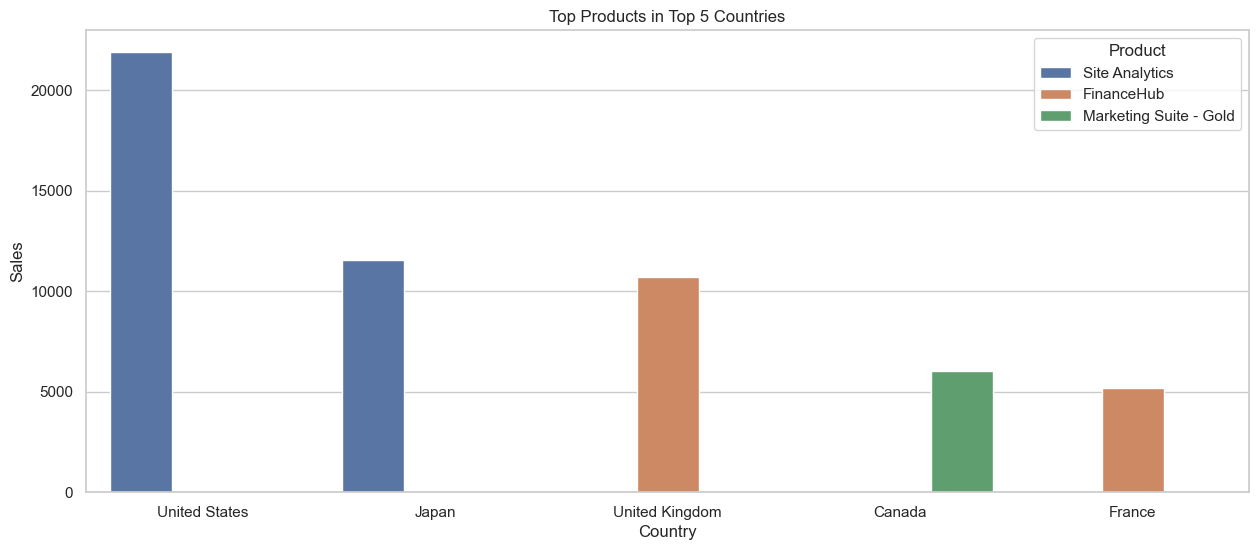

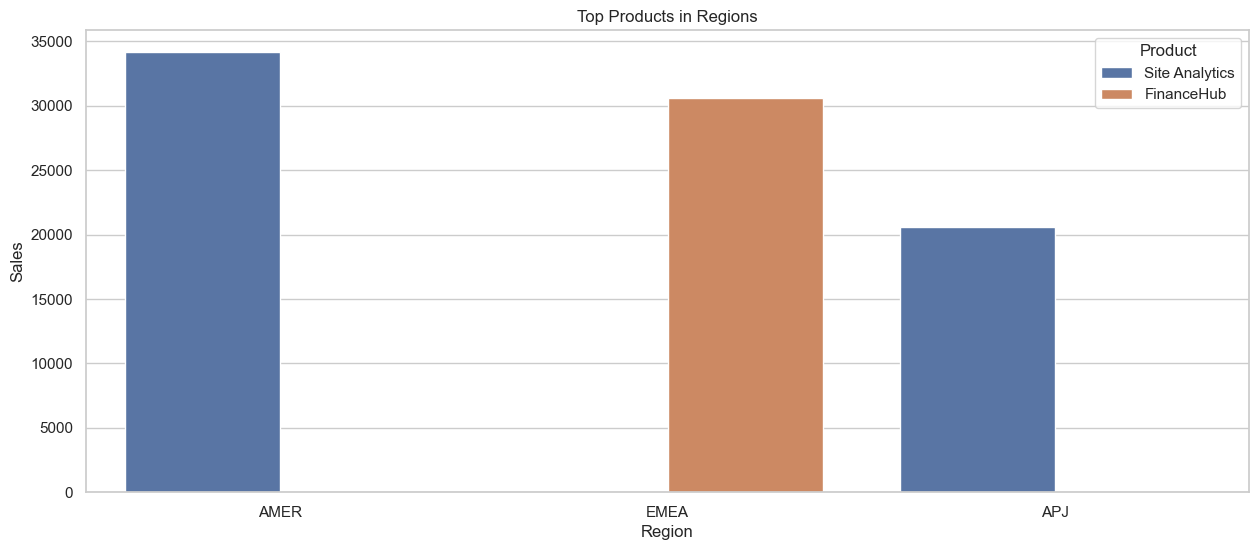

In [41]:
# Plot for Top Products in Top 5 Countries
plt.figure(figsize=(15, 6))
sns.barplot(x='Country', y='Sales', hue='Product', data=top_product_country.head(5))
plt.title('Top Products in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.show()

# Plot for Top Products in Regions
plt.figure(figsize=(15, 6))
sns.barplot(x='Region', y='Sales', hue='Product', data=top_product_region)
plt.title('Top Products in Regions')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

Top Products in Top 5 Countries:
- United States: "Site Analytics" is the top product, indicating a strong demand for data-driven decision-making tools in the U.S. market.
- Japan: The leading product is different, suggesting that the market dynamics or business needs may vary significantly from the U.S.
- United Kingdom: "FinanceHub" is the top product, which might reflect the strong financial services sector in the UK.
- Canada and France: These countries also have their top products, which may align with the unique demands or competitive landscape of their respective markets.

Top Products in Regions:
- AMER (Americas): "Site Analytics" again shows up as the top product, reinforcing the importance of analytics tools in this region.
- EMEA (Europe, Middle East, and Africa): "FinanceHub" is the most popular product, possibly due to the prominent financial industry in Europe.
- APJ (Asia-Pacific Japan): A different product leads in sales, which could indicate regional preferences or a strategic focus on specific solutions in the Asia-Pacific market.

### 4-3. Cities Contributing Significantly to Sales and Profit
- Top 10 Cities by Sales and Profit graph displays the top 10 cities based on sales and profit, with dual bars representing each metric for a comprehensive view of city-level performance.

In [42]:
# 4-3. Cities Contributing Significantly to Sales and Profit
sales_by_city = df_new.groupby('City').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales', ascending=False).head(10)
sales_by_city.head()

,Sales,Profit
City,,
New York City,51807.7165,8573.7749
London,51227.0030,10969.7247
Toronto,28232.6060,5295.5288
Los Angeles,26637.5340,5606.3066
Paris,22730.3030,1107.0865


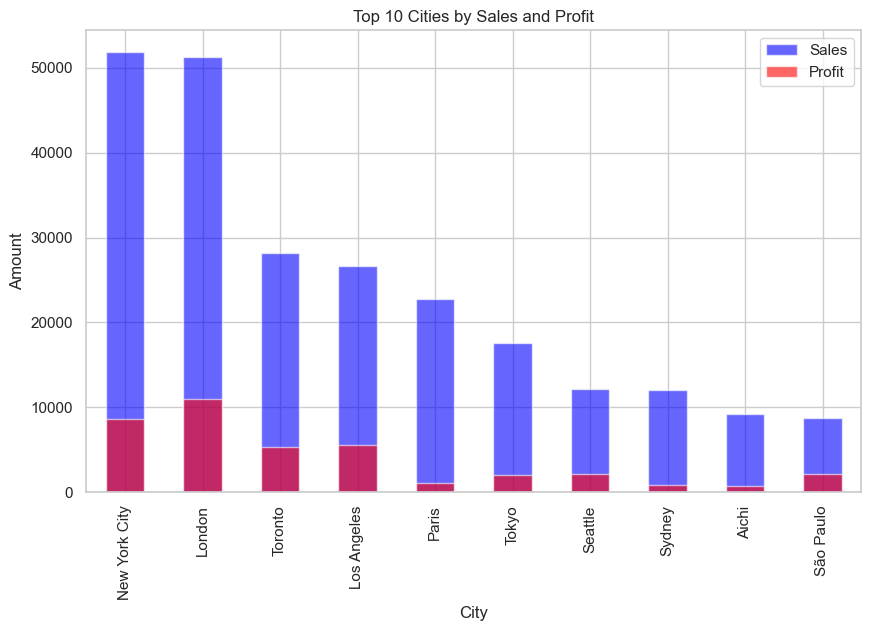

In [43]:
# Plot for Top Cities by Sales and Profit
plt.figure(figsize=(10, 6))
sales_by_city['Sales'].plot(kind='bar', color='blue', alpha=0.6, label='Sales')
sales_by_city['Profit'].plot(kind='bar', color='red', alpha=0.6, label='Profit')
plt.title('Top 10 Cities by Sales and Profit')
plt.xlabel('City')
plt.ylabel('Amount')
plt.legend()
plt.show()

Top 10 Cities by Sales and Profit 
- New York City and London are leading in both sales and profit, indicating that these cities are major hubs for the company's business activities. They may represent significant market share and customer base.
- Sales vs. Profit: The proportion of profit to sales varies across cities. For instance, while Tokyo's sales are relatively high, the profit is comparatively lower than for other cities like Paris. This could indicate higher operational costs or lower pricing strategies in Tokyo.
- Geographic Diversity: There is a representation of cities from various continents, suggesting the company's global reach and the geographic diversity of its market. However, the sales and profit figures vary, which could point to differing market penetration levels, customer preferences, and competitive landscapes.
- Market Penetration: Cities like Seattle, Sydney, and São Paulo, while among the top 10, show lower sales and profit, suggesting that there might be potential for market growth in these areas.

## 5. Sales and Profitability:

### 5-1. Discounts Impact on Sales and Profitability

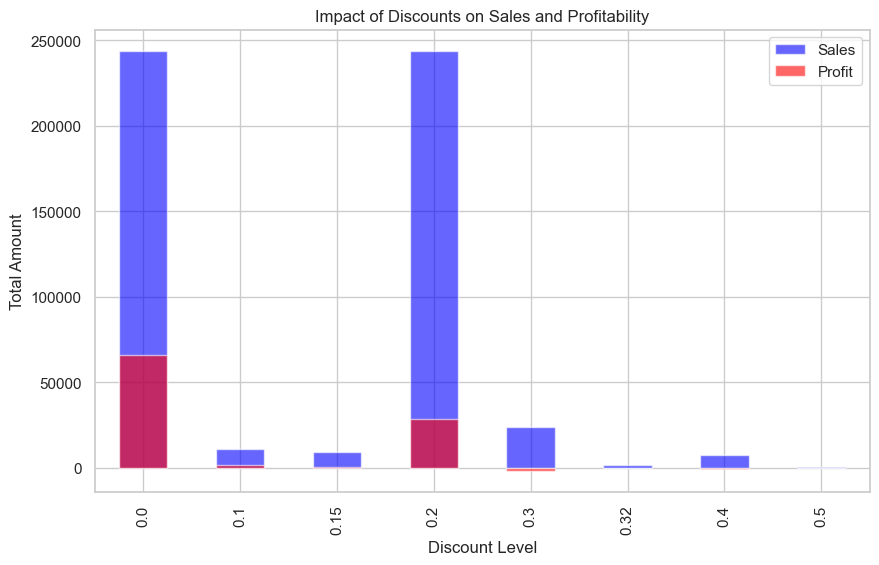

In [44]:
# 5-1: Impact of Discounts on Sales and Profitability
discount_impact = df_new.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plotting the results
# Impact of Discounts on Sales and Profitability
plt.figure(figsize=(10, 6))
discount_impact['Sales'].plot(kind='bar', color='blue', alpha=0.6, label='Sales')
discount_impact['Profit'].plot(kind='bar', color='red', alpha=0.6, label='Profit')
plt.title('Impact of Discounts on Sales and Profitability')
plt.xlabel('Discount Level')
plt.ylabel('Total Amount')
plt.legend()
plt.show()


Impact of Discounts on Sales and Profitability:

The bar chart illustrating the impact of discounts on sales and profitability shows two levels of discounts: 0.1 and 0.2, along with a few very small discount levels (0.15, 0.3, 0.32, 0.4, 0.5) that have minimal sales and profit associated with them.
- 0.0 Discount Level (Full Price): As expected, selling at full price results in the highest profitability. The sales volume is also high at this level, which indicates a strong customer base willing to purchase without discounts.
- 0.1 Discount Level: There is a significant increase in sales volume with a slight discount, suggesting that even a small price reduction can incentivize purchases. However, the profit at this discount level is relatively lower compared to full price, indicating that the discount does eat into the profit margin.
- 0.2 Discount Level: At a higher discount, there's a drastic increase in sales, but the profit plummets. This suggests that while larger discounts can drive volume, they are not sustainable from a profitability standpoint.
- Other Discount Levels: The smaller bars indicate that minimal sales are associated with other discount levels. This might be due to less frequent use of these discount levels or less effectiveness in driving sales.
- Profit Erosion with Increased Discounts: The contrast between sales and profit at different discount levels is stark, indicating that discounts have a disproportionate impact on profitability. This could be due to the cost structure of the products, where the variable costs may be high relative to the price.

### 5-2. Profitability of Different Customer Segments or Regions

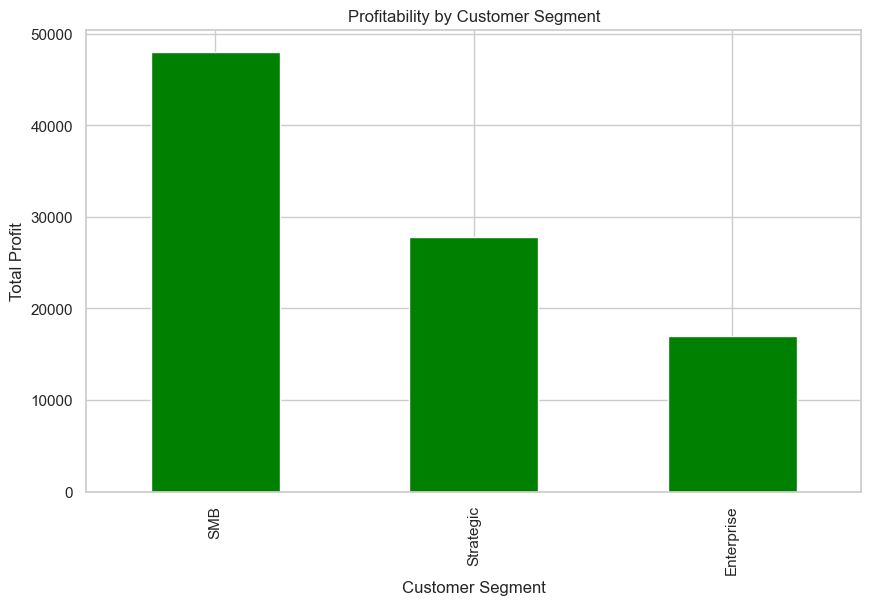

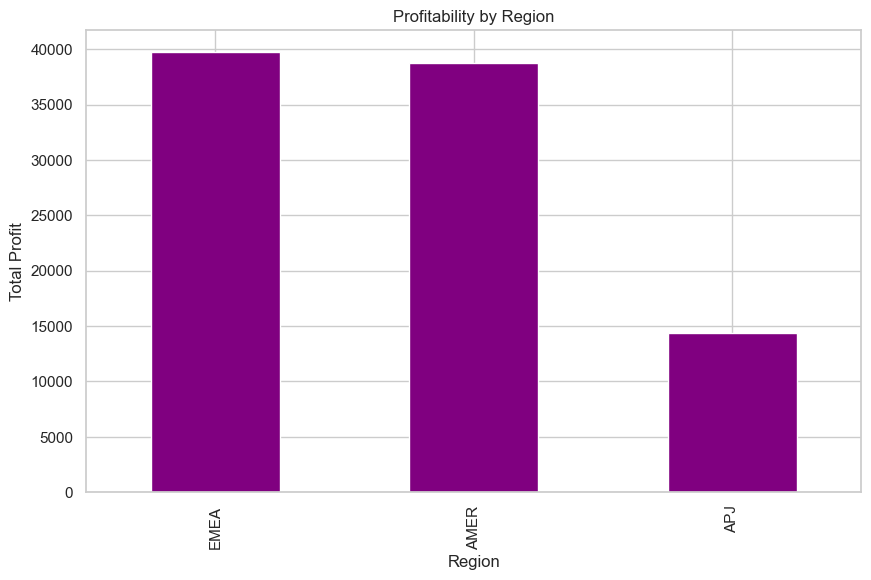

In [45]:
# 5-2: Profitability of Different Customer Segments and Regions
# Profitability by Customer Segment
profit_by_segment = df_new.groupby('Segment').agg({'Profit': 'sum'}).sort_values(by='Profit', ascending=False)

# Profitability by Region
profit_by_region = df_new.groupby('Region').agg({'Profit': 'sum'}).sort_values(by='Profit', ascending=False)

# Plotting the results
# Profitability by Customer Segment
plt.figure(figsize=(10, 6))
profit_by_segment['Profit'].plot(kind='bar', color='green')
plt.title('Profitability by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.show()

# Profitability by Region
plt.figure(figsize=(10, 6))
profit_by_region['Profit'].plot(kind='bar', color='purple')
plt.title('Profitability by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()


Profitability by Customer Segment:
- The SMB (Small and Medium Business) segment appears to be the most profitable, followed by Strategic and then Enterprise. This could suggest that the SMB segment, often more price-sensitive, might be less subject to heavy discounting, or that the products and services sold to this segment have a higher margin.
- The lower profitability in the Enterprise segment, despite potentially higher sales volumes, might indicate that larger customers are able to negotiate better pricing, which could impact margins.

Profitability by Region:
- The EMEA (Europe, Middle East, and Africa) region shows the highest profitability, closely followed by AMER (Americas), with APJ (Asia-Pacific Japan) lagging behind. This could reflect different pricing strategies, cost structures, or market maturity levels across these regions.
- The profitability trend does not necessarily follow the sales volume trend. This suggests that while the AMER region may have the highest sales, the EMEA region is achieving better profitability, which could be due to higher margins or more efficient operations. The APJ region shows the lowest profitability, which may point to higher costs, lower pricing, or less efficient operations in that region.

---

# Summary and Recommendation

## Key Questions Summary
1. Sales Trends:
    1. The overall sales trends over time show fluctuation with significant peaks, suggesting periods of high sales, and an upward trajectory towards the end of the dataset which may indicate growth or seasonality effects.
    2. Seasonal patterns in sales are evident, with higher sales typically towards the end of the year, likely due to seasonal events or year-end business dynamics.

2. Customer Analysis:
    1. The Finance industry contributes the most to sales, followed by Energy, Tech, and Manufacturing. These industries appear to be the top market sectors for the company.
    2. The top-performing customer segments are the SMBs, which are the most profitable, suggesting they may have a strong product-market fit or favorable cost structures in place.

3. Product Analysis:
    1. "Site Analytics" and "FinanceHub" are among the top sellers. However, "Support" is the most profitable, indicating a possible higher margin or a lower cost structure for this service.
    2. Product demand varies significantly by customer segment and region, with some products like "Marketing Suite - Gold" showing high sales in SMB segments, and others like "FinanceHub" being more popular in specific regions like AMER.

4. Geographic Analysis:
    1. The United States leads in both sales and profit, with other regions such as the United Kingdom and Japan also contributing significantly.
    2. Certain products are more popular in specific countries or regions, for instance, "Site Analytics" in the United States and "FinanceHub" in the United Kingdom.
    3. Major cities like New York City and London contribute significantly to sales and profit, highlighting them as key urban markets.

5. Sales and Profitability:
    1. Discounts have a clear impact on sales volume, with moderate discounts significantly increasing sales. However, higher discounts tend to diminish profitability, indicating that while discounts can drive sales, they must be balanced against their impact on profit margins.
    2. There is a significant difference in profitability across customer segments, with SMBs being the most profitable. Regionally, EMEA stands out as particularly profitable, while AMER also shows good profitability compared to APJ.

## Recommendations
Based on the data analysis performed, here are the actionable recommendations:

1. Optimize Seasonal Marketing and Inventory:
    - Capitalize on the end-of-year sales spikes by increasing marketing efforts and ensuring inventory levels are sufficient to meet the seasonal demand.
    - Consider running promotional campaigns during identified peak periods to maximize sales.
2. Industry-Specific Strategies:
    - Focus on the Finance industry, which contributes most to sales, by developing tailored products and services.
    - Explore opportunities in Energy, Tech, and Manufacturing with targeted marketing strategies and product development to expand market share.
3. Customer Segment Personalization:
    - Enhance engagement with the SMB segment where the company sees high profitability. This could involve creating customized service packages and loyalty programs.
    - Investigate the lower profitability in the Enterprise segment and develop strategies to improve margins, such as bundle offerings or premium support services.
4. Product Portfolio Management:
    - Prioritize the sales and marketing of high-margin products like "Support" to improve overall profitability.
    - Conduct market research to understand the demand drivers for top-selling products and adjust product development investments accordingly.
5. Geographical Expansion and Consolidation:
    - Strengthen the company’s presence in high-performing cities like New York City and London with focused sales initiatives and community engagement.
    - Analyze the lower sales and profit performance in cities like Tokyo and São Paulo to identify any market entry barriers or operational inefficiencies.
6. Discount Strategy Revamp:
    - Implement a strategic discounting approach that finds a balance between driving sales and maintaining profit margins. Consider tiered discounts based on customer loyalty or order size.
    - Monitor the impact of discounts on profitability closely and adjust quickly if margins are negatively impacted.
7. Profitability Enhancement Efforts:
    - Address the profitability gap in the APJ region by evaluating pricing strategies, cost of sales, and operational efficiencies.
    - Replicate best practices from the EMEA region across other regions to enhance profitability.
8. Cross-Selling and Up-Selling Initiatives:
    - Leverage the popularity of specific products within certain regions and customer segments to cross-sell and up-sell related products and services.
9. Customer Retention and Relationship Building:
    - Foster customer relationships in the most profitable segments and regions with personalized service, after-sales support, and customer appreciation initiatives.